# Exercises and Homework for week 7

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2022)
Nina Stiesdal & Thomas Erben

Homework is due on **Wednesday, 02/06/2022, 23:59pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers and with your tutor.
 * Your code(s) need(s) to be well and appropriately commented!
 * Submit this notebook and, if necessary, additional files in a `tar`-archive with name `Homework_7_group_XX.tgz` (replace `XX` with your group number) to your tutor.

**Topics of this exercise:**
 * Two-dimensional `numpy`-arrays - broadcasting
 * histograms
 * Monte-Carlo simulations

**Your group number here please:**  Group XX

## 1. Lecture Review (0 points)

If you did the lecture review questions [03_Lecture_Review.ipynb](03_Lecture_Review.ipynb) (strongly recommended!): 
Please discuss with your tutor and your group any issues/problems you had with them.

## 2. Magnitudes of Optical Imaging data (10 points)

In astronomy, optical imaging data are observed in well-defined parts of the electromagnetic spectrum. Typical broad-band filters are $B$ (blue; around $450$ nm), $R$ (red; around 650 nm) and $I$ (infrared; around 800 nm). One of the more difficult tasks during processing of optical data is to calibrate the brightness (or the magnitudes) of astronomical data. It is usually easire to calibrate some bands than others.

The figure below shows in the left panel two *colours* of stellar sources (a colour is just the difference of the magnitudes in two bands, e.g. $B-R$). The blue points are the data and the red points model predictions for the colours. We note that there is a difference between model and data that primarily originates from calibration errors in the data.

We assume that the $R$-band has a good calibration and the errors originate from problems in the $B$ and $I$ bands. If we apply *optimal shifts* (defined below) to the $B$ and $I$ magnitudes, we obtain the right panel of the figure below.

Your task is to write a program to estimate these shifts for the $B$ and $I$ band magnitudes.

![SLR](figs/SLR.png)

### The algorithm
We separately want to estimate necessary shifts for the $B$ and $I$ band magnitudes to match the model and the data magnitudes. The idea to do so is the following:

- We have arrays $d$ and $m$ with the $B-R$-colours from the data and the model respectively.
- We calculate the distance from *each point* in the $d$-array to *each point* in the $m$-array and we analyse all the obtained distances in a histogram. For the program data, I obtain the following histogram for the $B-R$ case:

<img src="figs/bmr_histo.png" style="width: 400px;" style="height: 200px;">

- The *optimal* shift is given by the highest histogram bin. 

### The program plan
1. **Before you start any coding:**
  Please be sure to understand the scientific problem and the algorithm to solve it.
  If you are unsure, please contact Nina or myself **well in advance** of the homework deadline! Please answer below the following questions: *Why do we use a histogram analysis for the given problem? Why can't we just calculate all the distance and take the distance appearing most often as an estimate for our shift? What physical meaning does the bin-width of the histogram have for our problem? How large would you choose the bin-width?*
2. In the files [data/stars_BRI_data.asc](data/stars_BRI_data.asc) and [data/stars_BRI_model.asc](data/stars_BRI_model.asc) you find the magnitudes of stars for data and model.
3. Read in the data into your program and reproduce as a first step the $B-R$ vs. $R-I$ plot for the uncorrected data.
4. Create an array `bmr_distances` containg the distances from *all* $B-R$ model points to *all* $B-R$ data points.

  **Hint:** This is a *one-line* broadcasting task! It is very easy if you understand the *Route 66* problem of the Review questions sheet!
5. Analyse the `bmr_distances`.array with the `np.histogram` function to obtain the optical shift to bring data and model into accordance.

  **Hints:**
  - Read carefully the documentation for the `np.histogram`-function. What does it return?
  - Use a histogram bin-width of 0.05. This is approximately the accuracy that we can reach with the proposed magnitude-correction method.
  - To determine the highest bin of the histogram you can use the `np.argmax` function. Read its documentation!
  - For checking purposes, you can plot your histogram with the `plt.hist`-function. It has exactly the same syntax and functionality as `np.histogram`!
6. Repeast steps (4) and (5) for the $R-I$ colour
7. Apply the obtained corrections to your data and reproduce the right panel of the plot above.
8. Discuss your results!

In [ ]:
# your solution here please

## 3. Monte-Carlo Error Propagation

You have likely encountered the concept of propagation of uncertainty before in some lab-courses (see [the usual rules here](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas)). The idea is that given measurements with uncertainties, we can find the uncertainty on the final result of an equation.

For example, let us consider the following equation:

$$F = \frac{G~M_1~M_2}{r^2}$$

which gives the gravitational force between two masses $M_1$ and $M_2$ separated by a distance $r$.

Let us now imagine that we have two masses:

$$M_1=40\times10^4\pm0.05\times10^4\rm{kg}$$

and

$$M_2=30\times10^4\pm0.1\times10^4\rm{kg}$$

separated by a distance:

$$r=3.2\pm0.011~\rm{m}$$

where the uncertaintes are the standard deviations of Gaussian distributions which could be e.g. measurement errors.

We also know:

$$G = 6.67384\times10^{-11}~\rm{m}^3~\rm{kg}^{-1}~\rm{s}^{-2}$$

(exact value, no uncertainty)

Use the [standard error propagation rules](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas) to determine the resulting force and uncertainty in a `python`-program (you can just derive the equation by hand and implement it in a single line in your code).

Now, we can try using a **Monte-Carlo** technique instead. The idea behind Monte-Carlo techniques is to generate many possible solutions using random numbers and using these to look at the overall results. In the above case, you can propagate uncertainties with a Monte-Carlo method by doing the following:

* randomly sample values of $M_1$, $M_2$, and $r$, 1000000 times, using the means and standard deviations given above
  **Hint:** You can get random numbers which are distributed according to the normal (Gaussian) distribution with the `normal` command within the `numpy.random` module.

* compute the gravitational force for each set of values

You should do this with Numpy arrays, and **without any loops**. You should then get an array of 1000000 different values for the forces.

Make a plot of the normalized histogram of these values of the force, and then overplot a Gaussian function with the mean and standard deviation derived with the standard error propagation rules. Make sure that you pick the range of x values in the plot wisely, so that the two distributions can be seen. Make sure there are also a sensible number of bins in the histogram so that you can compare the shape of the histogram and the Gaussian function. The two distributions should agree pretty well.

For your reference, here is the plot that I obtain for this part of the exercise:

<img src="figs/monte_carlo_force.png" style="width: 400px;" style="height: 400px;">

The blue bars are the normalized histogram of my Monte-Carlo simulated forces. The red curve gives the Gaussian prediction for these forces from standard error propagation.  

Now repeat the experiment above with the following values:

$$M_1=40\times10^4\pm 8\times10^4\rm{kg}$$
$$M_2=30\times10^4\pm 6\times10^4\rm{kg}$$
$$r=3.2\pm 0.6~\rm{m}$$

and as above, produce a plot.

In this case, which method do you think is more accurate? Why? What do you think are the advantages of using a Monte-Carlo technique?

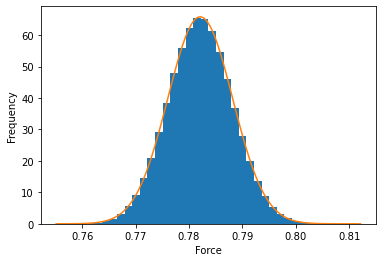

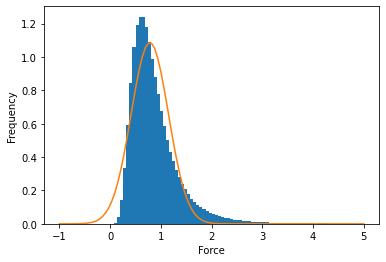

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

def errorPropagation(g , m1, m1er, m2, m2er, r, rer):
    return g *  np.sqrt(np.power(m2 * m1er / np.power(r, 2), 2) + np.power(m1 * m2er / np.power(r,2),2) + np.power(2 *m2 * m1 * rer / np.power(r,3), 2))

def force(g, m1, m2, r):
    return g*m1*m2/np.power(r,2)

m1 = 400000
m1er = 500
m2 = 300000
m2er = 1000
r = 3.2
rer = 0.011
g = float(6.67384e-11) 
nsamples = 1000000

monteCarlo = force(g, np.random.normal(m1,m1er, nsamples), np.random.normal(m2,m2er, nsamples), np.random.normal(r,rer, nsamples))


plt.hist(monteCarlo, density = True, bins= 40)
xVal = np.linspace(np.min(monteCarlo),np.max(monteCarlo), 100)
plt.plot(xVal, scipy.stats.norm(force(g, m1, m2, r), errorPropagation(g, m1, m1er, m2,m2er, r, rer)).pdf(xVal))
plt.xlabel("Force")
plt.ylabel("Frequency")
plt.show()


# new errors
m1 = 400000
m1er = 8e4
m2 = 300000
m2er = 6e4
r = 3.2
rer = 0.6
g = float(6.67384e-11) 
nsamples = 1000000

monteCarlo = force(g, np.random.normal(m1,m1er, nsamples), np.random.normal(m2,m2er, nsamples), np.random.normal(r,rer, nsamples))


plt.hist(monteCarlo, density = True, bins= 100, range=[-1,5])
xVal = np.linspace(-1,5, 100)
plt.plot(xVal, scipy.stats.norm(force(g, m1, m2, r), errorPropagation(g, m1, m1er, m2,m2er, r, rer)).pdf(xVal))
plt.xlabel("Force")
plt.ylabel("Frequency")
plt.show()

For the error propagation formula to be a good approximation, we have to assume the errors to be small, since we use the taylor expansion in the derivation of the formula. We  can see that it holds in the first case, but fails in the second case. There The errors are too big to assume a gaussian distribution of the force, thus making the gaussian error propagation inappropriate to use.